In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn import metrics
import pandas as pd
import numpy as np
from scipy import stats
from operator import sub
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('data/rock_music.csv')
dataset.set_index('name', inplace=True)
dataset

,artist,release_date,duration,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,hit
name,,,,,,,,,,,,,,,,
Smells Like Teen Spirit,Nirvana,1991,5.03,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720,1
Stairway to Heaven - Remaster,Led Zeppelin,1971,8.05,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197,1
Bohemian Rhapsody - Remastered 2011,Queen,1975,5.91,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228,1
Imagine - Remastered 2010,John Lennon,1971,3.13,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169,1
(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.71,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.56,47,0.296,0.005910,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406,0
Cellophane,King Gizzard & The Lizard Wizard,2014,3.18,44,0.432,0.002130,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357,0
Hot Water,King Gizzard & The Lizard Wizard,2014,3.40,40,0.627,0.860000,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734,0


In [3]:
dataset = dataset.apply(LabelEncoder().fit_transform).drop(['hit'], axis=1)
dataset.head(3)

,artist,release_date,duration,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
name,,,,,,,,,,,,,,,
Smells Like Teen Spirit,942,35,343,74,362,100,748,908,1,594,3567,331,2037,2,706
Stairway to Heaven - Remaster,772,15,580,78,198,2328,182,1451,9,604,672,106,312,2,183
Bohemian Rhapsody - Remastered 2011,1045,19,430,74,252,2067,239,0,0,731,1226,303,3919,2,214


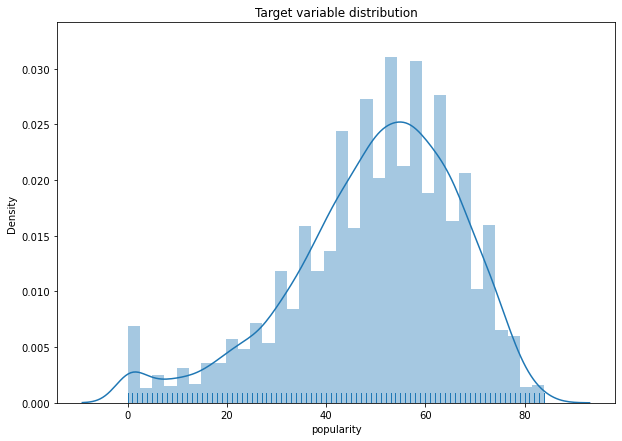

In [4]:
plt.figure(figsize=(10,7))
sns.distplot(dataset['popularity'], kde=True, rug=True)
plt.title('Target variable distribution')
plt.show()

In [5]:
X = dataset.drop(['popularity'], axis = 1)
Y = dataset['popularity']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [7]:
X_columns = X.columns

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X = scaler.transform(X)

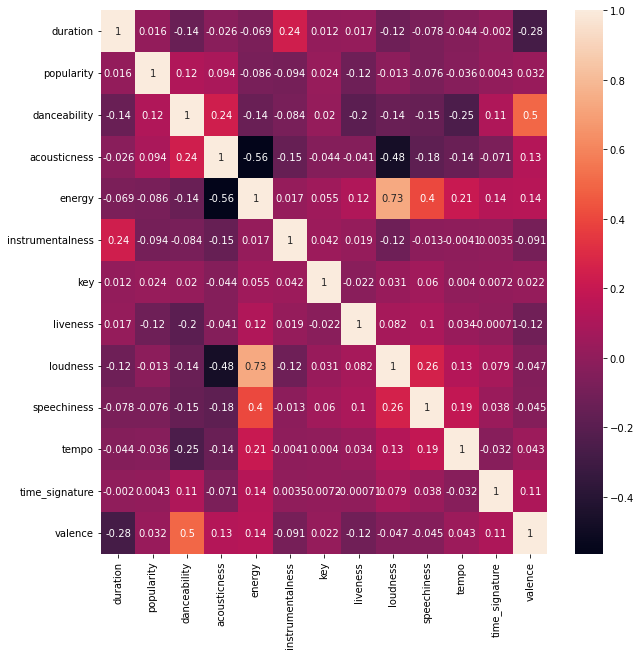

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset[dataset.columns.drop(['artist', 'release_date'])].corr(), annot=True)
plt.show()

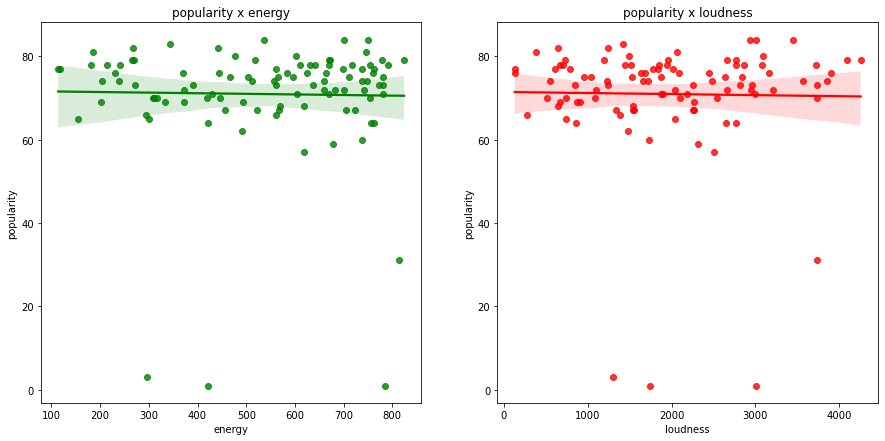

In [10]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.regplot(data=dataset.head(100), x='energy', y='popularity', ax=plt.gca(), color='green')
plt.title('popularity x energy')
plt.subplot(1,2,2)
sns.regplot(data=dataset.head(100), x='loudness', y='popularity', ax=plt.gca(), color='red')
plt.title('popularity x loudness')
plt.show()

&nbsp;

## Linear Regression

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
coeff_lr = pd.DataFrame(lr.coef_, X_columns, columns=['Coefficient'])
coeff_lr

,Coefficient
artist,-0.132856
release_date,-5.533575
duration,0.974046
danceability,2.271690
acousticness,-0.253710
energy,-1.895997
instrumentalness,-1.375187
key,0.741767
liveness,-1.288518
loudness,3.915591


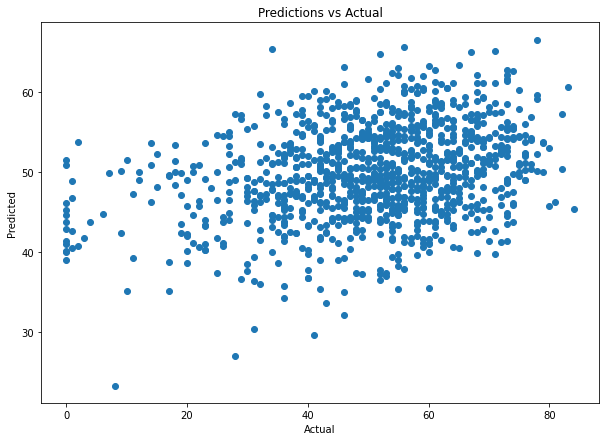

In [13]:
predictions = lr.predict(X_test)
plt.figure(figsize=(10,7))
plt.scatter(y_test, predictions)
plt.title('Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

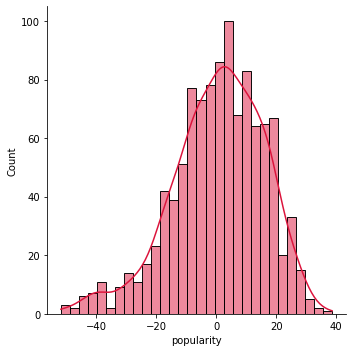

In [14]:
sns.displot((y_test - predictions), bins=30, kde=True, color='crimson')
plt.show()

In [15]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, predictions)}')
print(f'\nMean Squared Error(MSE): {metrics.mean_squared_error(y_test, predictions)}')
print(f'\nRoot Mean Square Error(RMSE): {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')

Mean Absolute Error(MAE): 12.102340122055137

Mean Squared Error(MSE): 233.19901961942534

Root Mean Square Error(RMSE): 15.270855235363387


In [16]:
x = dataset[X_columns]
y = dataset['popularity']

In [17]:
results = sm.OLS(y, x).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              3376.
Date:                Sat, 17 Sep 2022   Prob (F-statistic):                        0.00
Time:                        23:01:32   Log-Likelihood:                         -22758.
No. Observations:                5368   AIC:                                  4.554e+04
Df Residuals:                    5354   BIC:                                  4.564e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

&nbsp;

## Polynomial basis functions

In [18]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [19]:
X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y, test_size = 0.2)

In [20]:
lr.fit(X_train_poly, Y_train_poly)
coeff_lr = pd.DataFrame(lr.coef_, columns=['Coefficient'])
coeff_lr

,Coefficient
0,-1.350916e-17
1,2.296798e-04
2,-5.618550e+00
3,1.209691e+00
4,2.513893e+00
...,...
115,-1.723338e-01
116,-3.417359e-01
117,-1.141618e-01
118,6.381364e-02


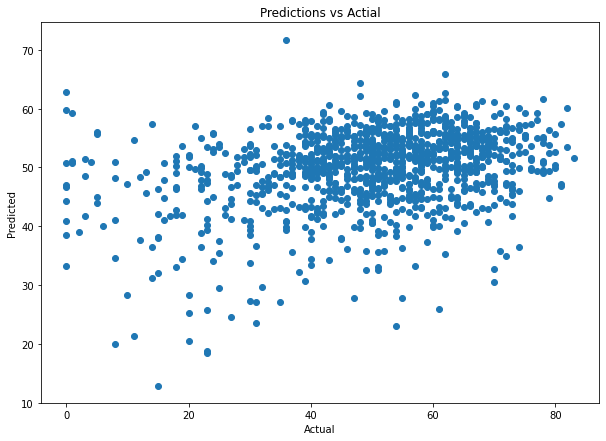

In [21]:
y_pred = lr.predict(X_test_poly)
plt.figure(figsize=(10,7))
plt.scatter(Y_test_poly, y_pred)
plt.title('Predictions vs Actial')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

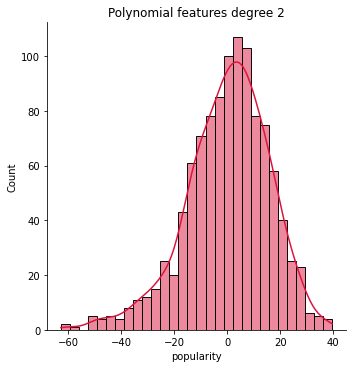

In [22]:
sns.displot((Y_test_poly - y_pred), bins=30, kde=True, color='crimson')
plt.title('Polynomial features degree 2')
plt.show()

In [23]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(Y_test_poly, y_pred)}')
print(f'\nMean Squared Error(MSE): {metrics.mean_squared_error(Y_test_poly, y_pred)}')
print(f'\nRoot Mean Square Error(RMSE): {np.sqrt(metrics.mean_squared_error(Y_test_poly, y_pred))}')

Mean Absolute Error(MAE): 12.204105580245006

Mean Squared Error(MSE): 246.1998908382636

Root Mean Square Error(RMSE): 15.690758134591954


&nbsp;

## Lasso regression (L1 Regularization)

In [24]:
lasso = Lasso(alpha=0.05, random_state=0, max_iter=10000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05, max_iter=10000, random_state=0)

In [25]:
coeff_lasso = pd.DataFrame(lasso.coef_, X_columns, columns=['Coefficient'])
coeff_lasso

,Coefficient
artist,-0.095167
release_date,-5.399587
duration,0.908911
danceability,2.146315
acousticness,-0.115482
energy,-1.666735
instrumentalness,-1.328355
key,0.687244
liveness,-1.267928
loudness,3.700883


In [26]:
lasso_predicted = lasso.predict(X_test)

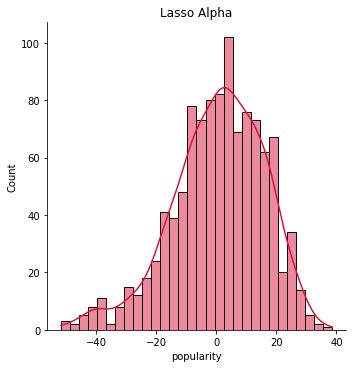

In [27]:
sns.displot((y_test - lasso_predicted), bins=30, kde=True, color='crimson')
plt.title('Lasso Alpha')
plt.show()

In [28]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, lasso_predicted)}')
print(f'\nMean Squared Error(MSE): {metrics.mean_squared_error(y_test, lasso_predicted)}')
print(f'\nRoot Mean Square Error(RMSE): {np.sqrt(metrics.mean_squared_error(y_test, lasso_predicted))}')

Mean Absolute Error(MAE): 12.086924892615981

Mean Squared Error(MSE): 232.73233241974535

Root Mean Square Error(RMSE): 15.255567259847972


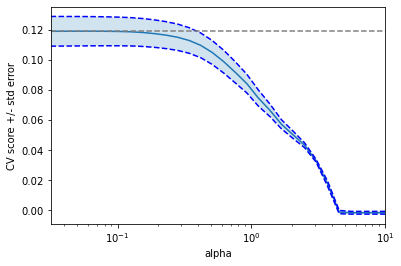

In [29]:
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-1.5, 1, 30)

parameters = [{'alpha': alphas}]
n_folds = 5

model = GridSearchCV(lasso, parameters, cv=n_folds, refit=False)
model.fit(X_train, y_train)
scores = model.cv_results_['mean_test_score']
scores_std = model.cv_results_['std_test_score']
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

&nbsp;

## Ridge regression (L2 Regularization)

In [30]:
ridge = Ridge(alpha=62.2, random_state=0, max_iter=10000)
ridge.fit(X_train, y_train)

Ridge(alpha=62.2, max_iter=10000, random_state=0)

In [31]:
coeff_ridge = pd.DataFrame(ridge.coef_, X_columns, columns=['Coefficient'])
coeff_ridge

,Coefficient
artist,-0.138356
release_date,-5.387386
duration,0.943540
danceability,2.197381
acousticness,-0.202568
energy,-1.734489
instrumentalness,-1.377334
key,0.727752
liveness,-1.288897
loudness,3.699656


In [32]:
ridge_predicted = ridge.predict(X_test)

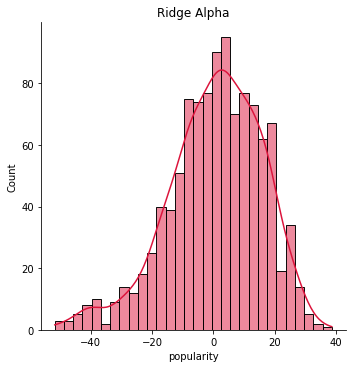

In [33]:
sns.displot((y_test - ridge_predicted), bins=30, kde=True, color='crimson')
plt.title('Ridge Alpha')
plt.show()

In [34]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, ridge_predicted)}')
print(f'\nMean Squared Error(MSE): {metrics.mean_squared_error(y_test, ridge_predicted)}')
print(f'\nRoot Mean Square Error(RMSE): {np.sqrt(metrics.mean_squared_error(y_test, ridge_predicted))}')

Mean Absolute Error(MAE): 12.089191494324377

Mean Squared Error(MSE): 232.97199443620124

Root Mean Square Error(RMSE): 15.263420142163461


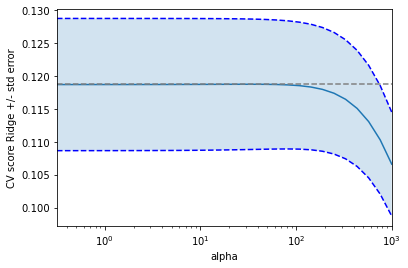

In [35]:
ridge = Ridge(random_state=0, max_iter=10000)
alphas = np.logspace(-0.5, 3, 30)

tuned_parameters = [{'alpha': alphas}]

model = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False)
model.fit(X_train, y_train)
scores = model.cv_results_['mean_test_score']
scores_std = model.cv_results_['std_test_score']
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score Ridge +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()